<a href="https://colab.research.google.com/github/Gurpreet-KSaini/INSE6220/blob/main/INSE6220_GurpreetKaur_40226346.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install PyCaret

In [61]:
!pip install pycaret[analysis]
!pip install "schemdraw<0.16"
















































Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from pycaret.utils import version
version()

'3.0.0'

# Import Libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


# DataSet

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/Gurpreet-KSaini/INSE6220/main/INSE6220_Automobile.csv')
df.head(25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,Class
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1
5,15.0,8,429.0,198,4341,10.0,1
6,14.0,8,454.0,220,4354,9.0,1
7,14.0,8,440.0,215,4312,8.5,1
8,14.0,8,455.0,225,4425,10.0,1
9,15.0,8,390.0,190,3850,8.5,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    int64  
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   Class         391 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.5 KB


In [67]:
print("length of data",len(df))
print("Number of duplicated rows is: ", df.duplicated().sum())

length of data 391
Number of duplicated rows is:  0


In [68]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


# Exploratory Data Analysis

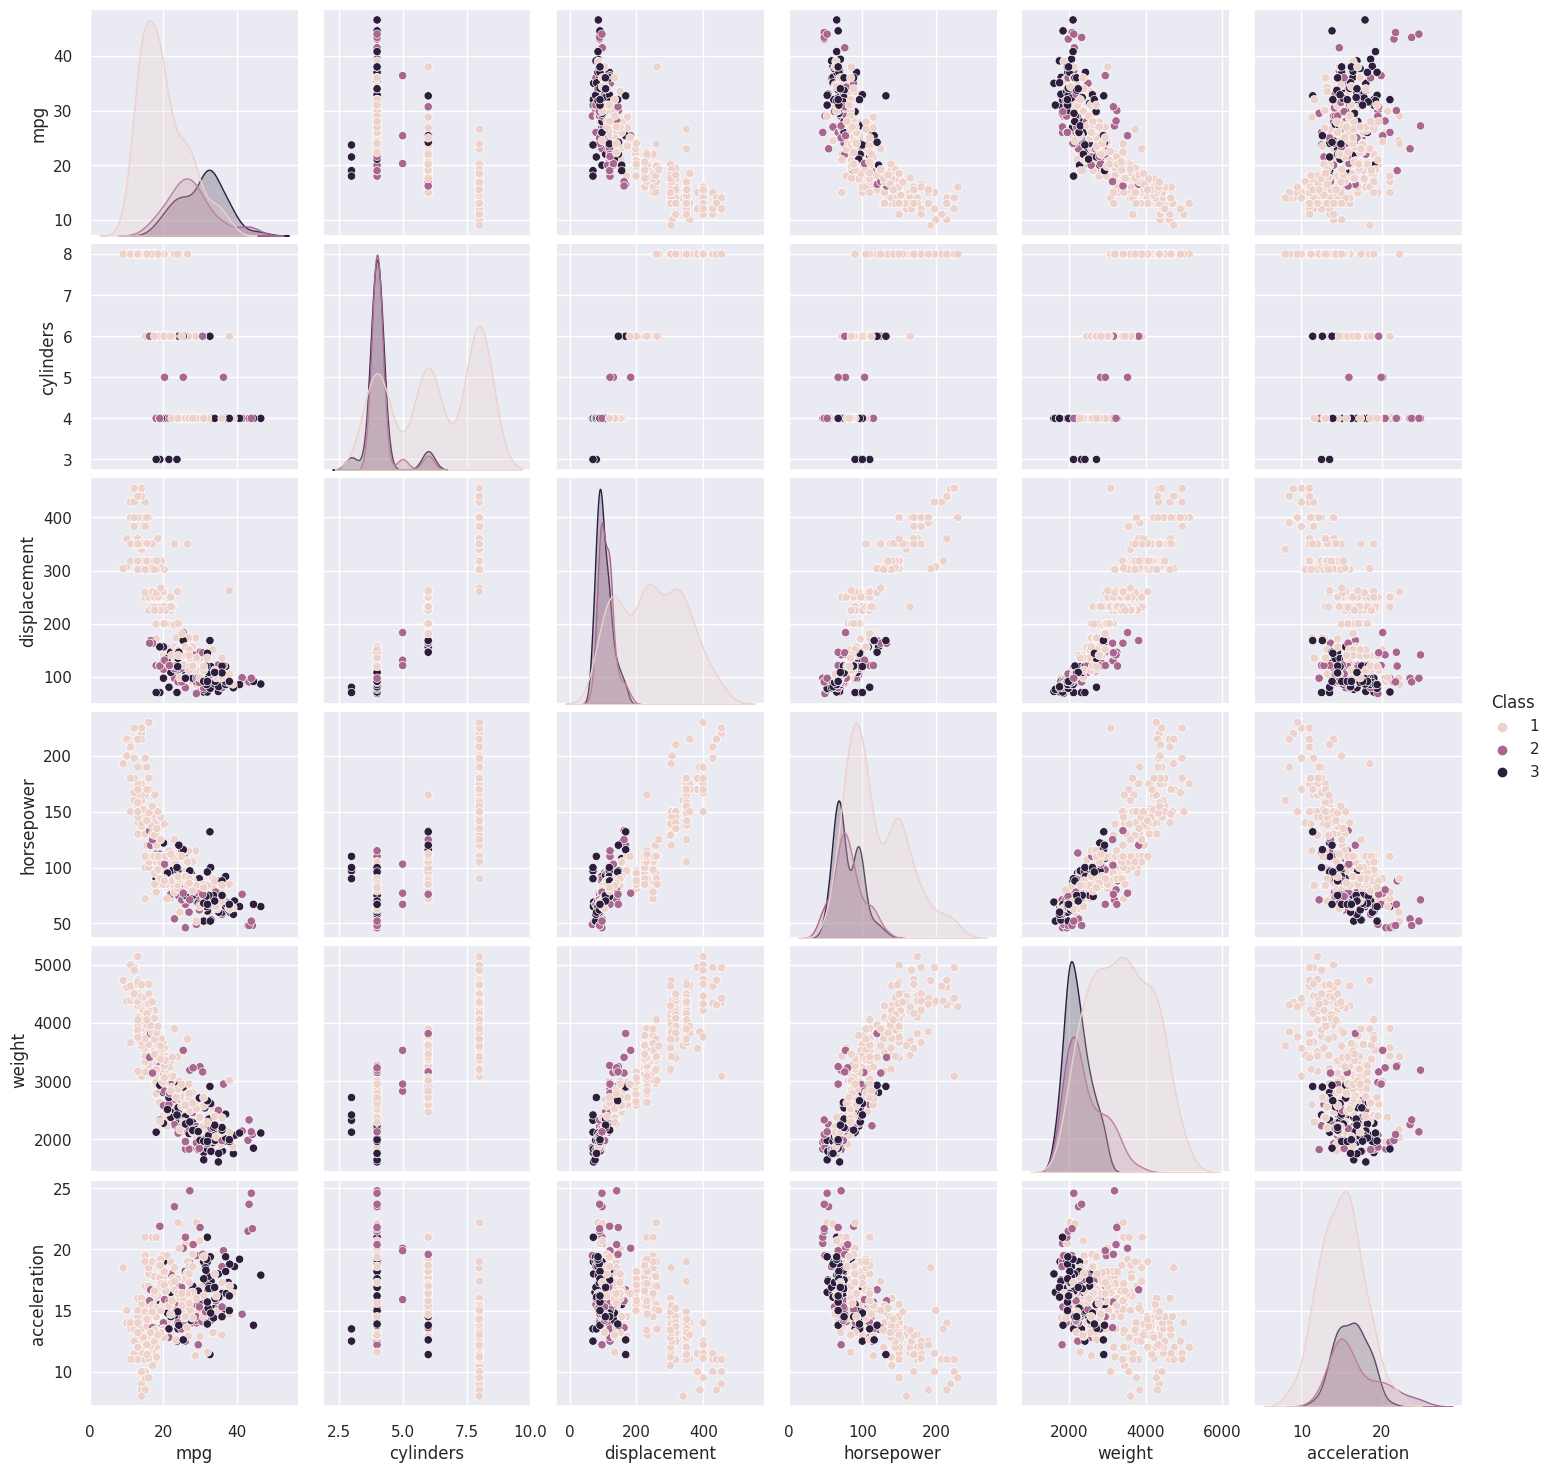

In [69]:
sns.pairplot(df, hue='Class')
plt.show()

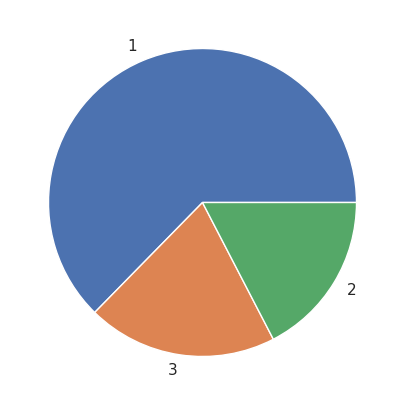

In [70]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

# Data Matrix

In [71]:
X = df.drop(columns=['Class'])
X.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
5,15.0,8,429.0,198,4341,10.0
6,14.0,8,454.0,220,4354,9.0
7,14.0,8,440.0,215,4312,8.5
8,14.0,8,455.0,225,4425,10.0
9,15.0,8,390.0,190,3850,8.5


In [72]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,391.0,23.436829,7.812930,9.0,17.00,22.5,29.00,46.6
cylinders,391.0,5.475703,1.706337,3.0,4.00,4.0,8.00,8.0
displacement,391.0,194.661125,104.661608,68.0,105.00,151.0,284.50,455.0
horsepower,391.0,104.511509,38.531429,46.0,75.00,94.0,127.00,230.0
weight,391.0,2979.751918,849.404444,1613.0,2227.00,2807.0,3616.50,5140.0
acceleration,391.0,15.543990,2.761894,8.0,13.75,15.5,17.05,24.8


# Standardize the Data

In [73]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,-0.696767,1.481261,1.074728,0.662346,0.617986,-1.284818
1,-1.081238,1.481261,1.486103,1.571859,0.840780,-1.466085
2,-0.696767,1.481261,1.179964,1.182068,0.537827,-1.647352
3,-0.953081,1.481261,1.046028,1.182068,0.534291,-1.284818
4,-0.824924,1.481261,1.026894,0.922207,0.553151,-1.828619
5,-1.081238,1.481261,2.241883,2.429400,1.604644,-2.009886
6,-1.209395,1.481261,2.481054,3.001094,1.619969,-2.372420
7,-1.209395,1.481261,2.347119,2.871164,1.570459,-2.553687
8,-1.209395,1.481261,2.490621,3.131025,1.703664,-2.009886
9,-1.081238,1.481261,1.868776,2.221512,1.025852,-2.553687


In [74]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,391.0,3.634490e-16,1.001281,-1.850180,-0.824924,-0.120061,0.712959,2.968521
cylinders,391.0,1.817245e-17,1.001281,-1.452746,-0.865945,-0.865945,1.481261,1.481261
displacement,391.0,-3.634490e-17,1.001281,-1.211747,-0.857774,-0.417699,0.859474,2.490621
horsepower,391.0,-1.090347e-16,1.001281,-1.520485,-0.766889,-0.273153,0.584388,3.260955
weight,391.0,1.635520e-16,1.001281,-1.611132,-0.887347,-0.203641,0.750601,2.546509
acceleration,391.0,2.362418e-16,1.001281,-2.734955,-0.650383,-0.015948,0.545980,3.355621


# Observations and variables

In [75]:
observations = list(df.index)
variables = list(df.columns)

# Box and Whisker Plots

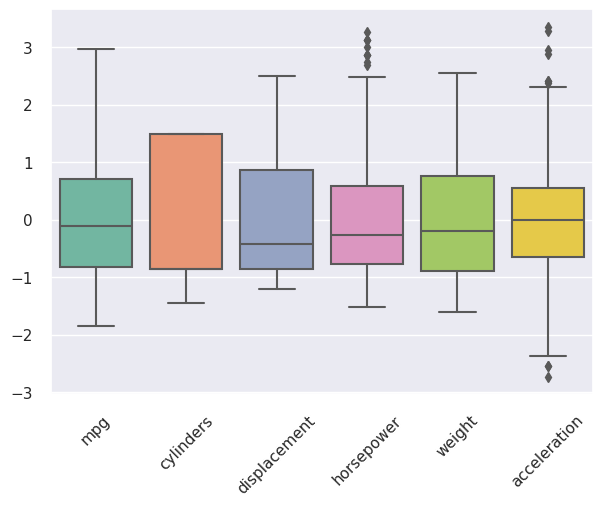

In [76]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

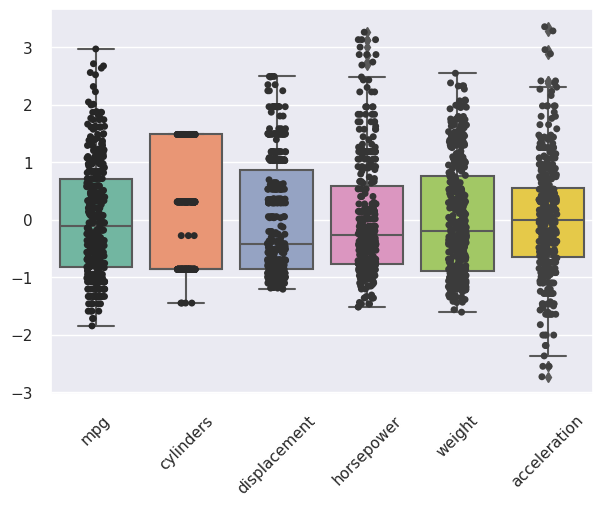

In [77]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# Correlation Matrix

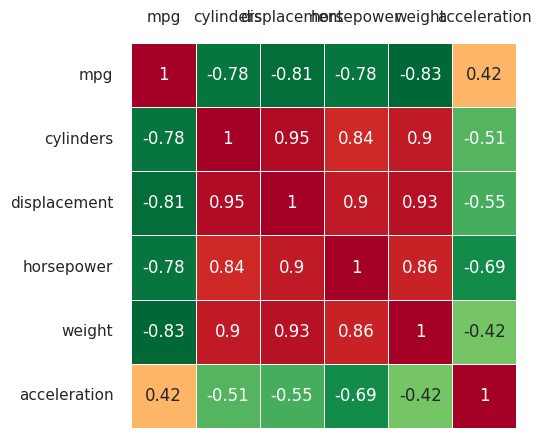

In [78]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_1$')

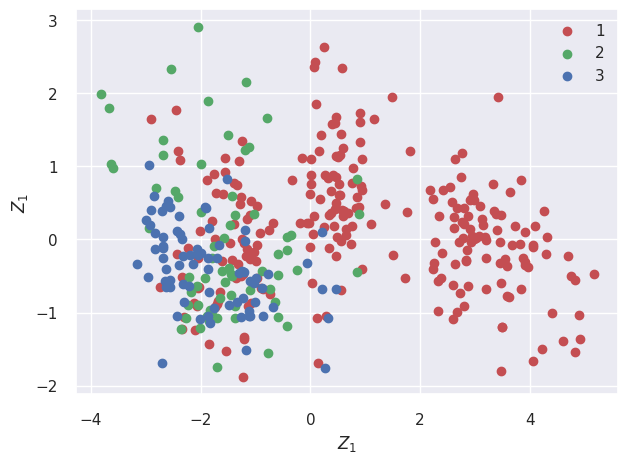

In [79]:
pca =PCA()
Z = pca.fit_transform(X)


idx_1 = np.where(y == 1)
idx_2 = np.where(y == 2)
idx_3 = np.where(y == 3)


plt.figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label=1)
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label=2)
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label=3)

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_1$') 

# Eigenvectors

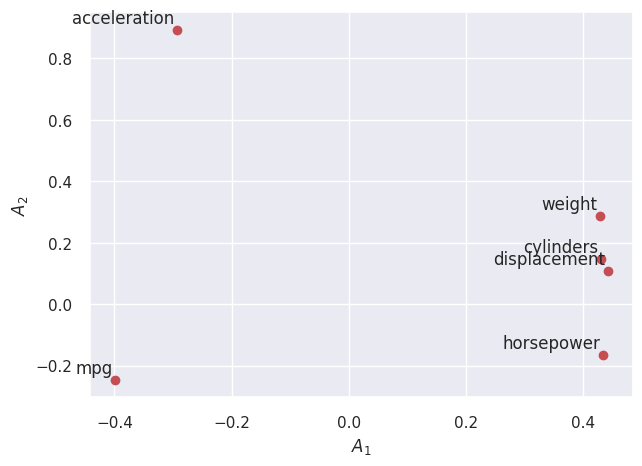

In [80]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$') 
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [81]:
A

array([[-0.39886747, -0.24654155,  0.85154662,  0.22121919, -0.07137659,
        -0.03094867],
       [ 0.43052936,  0.14798696,  0.40112058, -0.57646732,  0.28451323,
        -0.46752996],
       [ 0.44347973,  0.10794261,  0.29751236, -0.11059972, -0.00487359,
         0.83120663],
       [ 0.43407284, -0.16583604,  0.02238622,  0.67462961,  0.55930446,
        -0.12502576],
       [ 0.43004084,  0.28608344,  0.12474685,  0.34181367, -0.72657425,
        -0.27002341],
       [-0.29243901,  0.89236774,  0.09692325,  0.18588577,  0.27055911,
         0.03177057]])

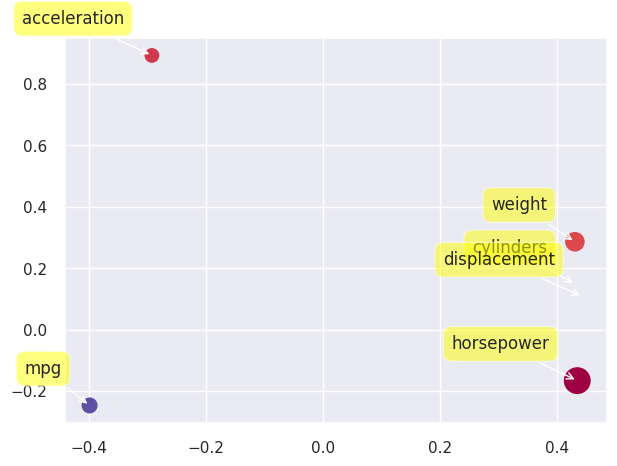

In [82]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Scree plot

Text(0, 0.5, 'Explained variance')

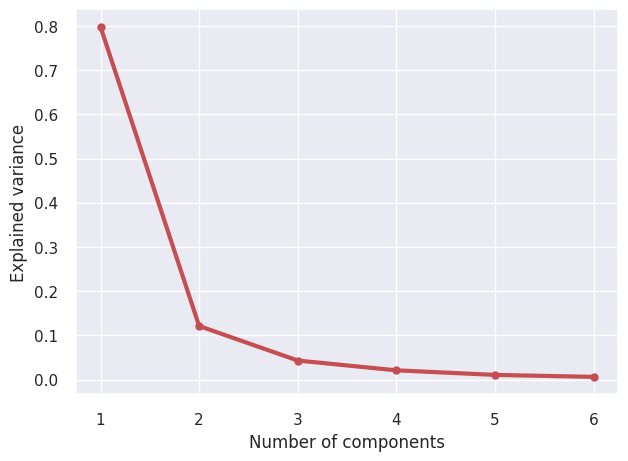

In [83]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [84]:
Lambda

array([4.80203135, 0.72890099, 0.25894894, 0.12565024, 0.06341362,
       0.03643948])

# Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

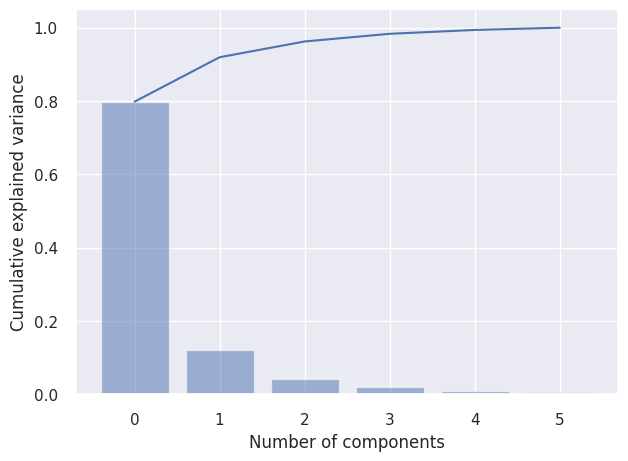

In [85]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Biplot

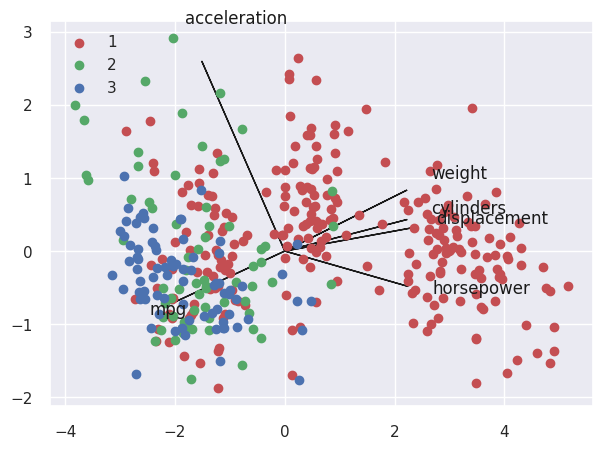

In [86]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='3')

plt.legend(loc='upper left')

# Using PCA Library

In [87]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


# Principal Components

In [89]:
out['PC']

,PC1,PC2,PC3
0,2.321261,-0.572577,0.287970
1,3.200665,-0.682233,0.113548
2,2.665075,-0.993852,0.285776
3,2.600373,-0.622615,0.062362
4,2.595111,-1.093057,0.109629
...,...,...,...
386,-1.097803,-0.263275,-0.150777
387,-3.821503,1.990758,1.781480
388,-1.224020,-1.878786,0.166143
389,-1.714436,0.629540,-0.021492


# Scatter plot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.34%] of the variance'}, xlabel='PC1 (79.8% expl.var)', ylabel='PC2 (12.1% expl.var)'>)

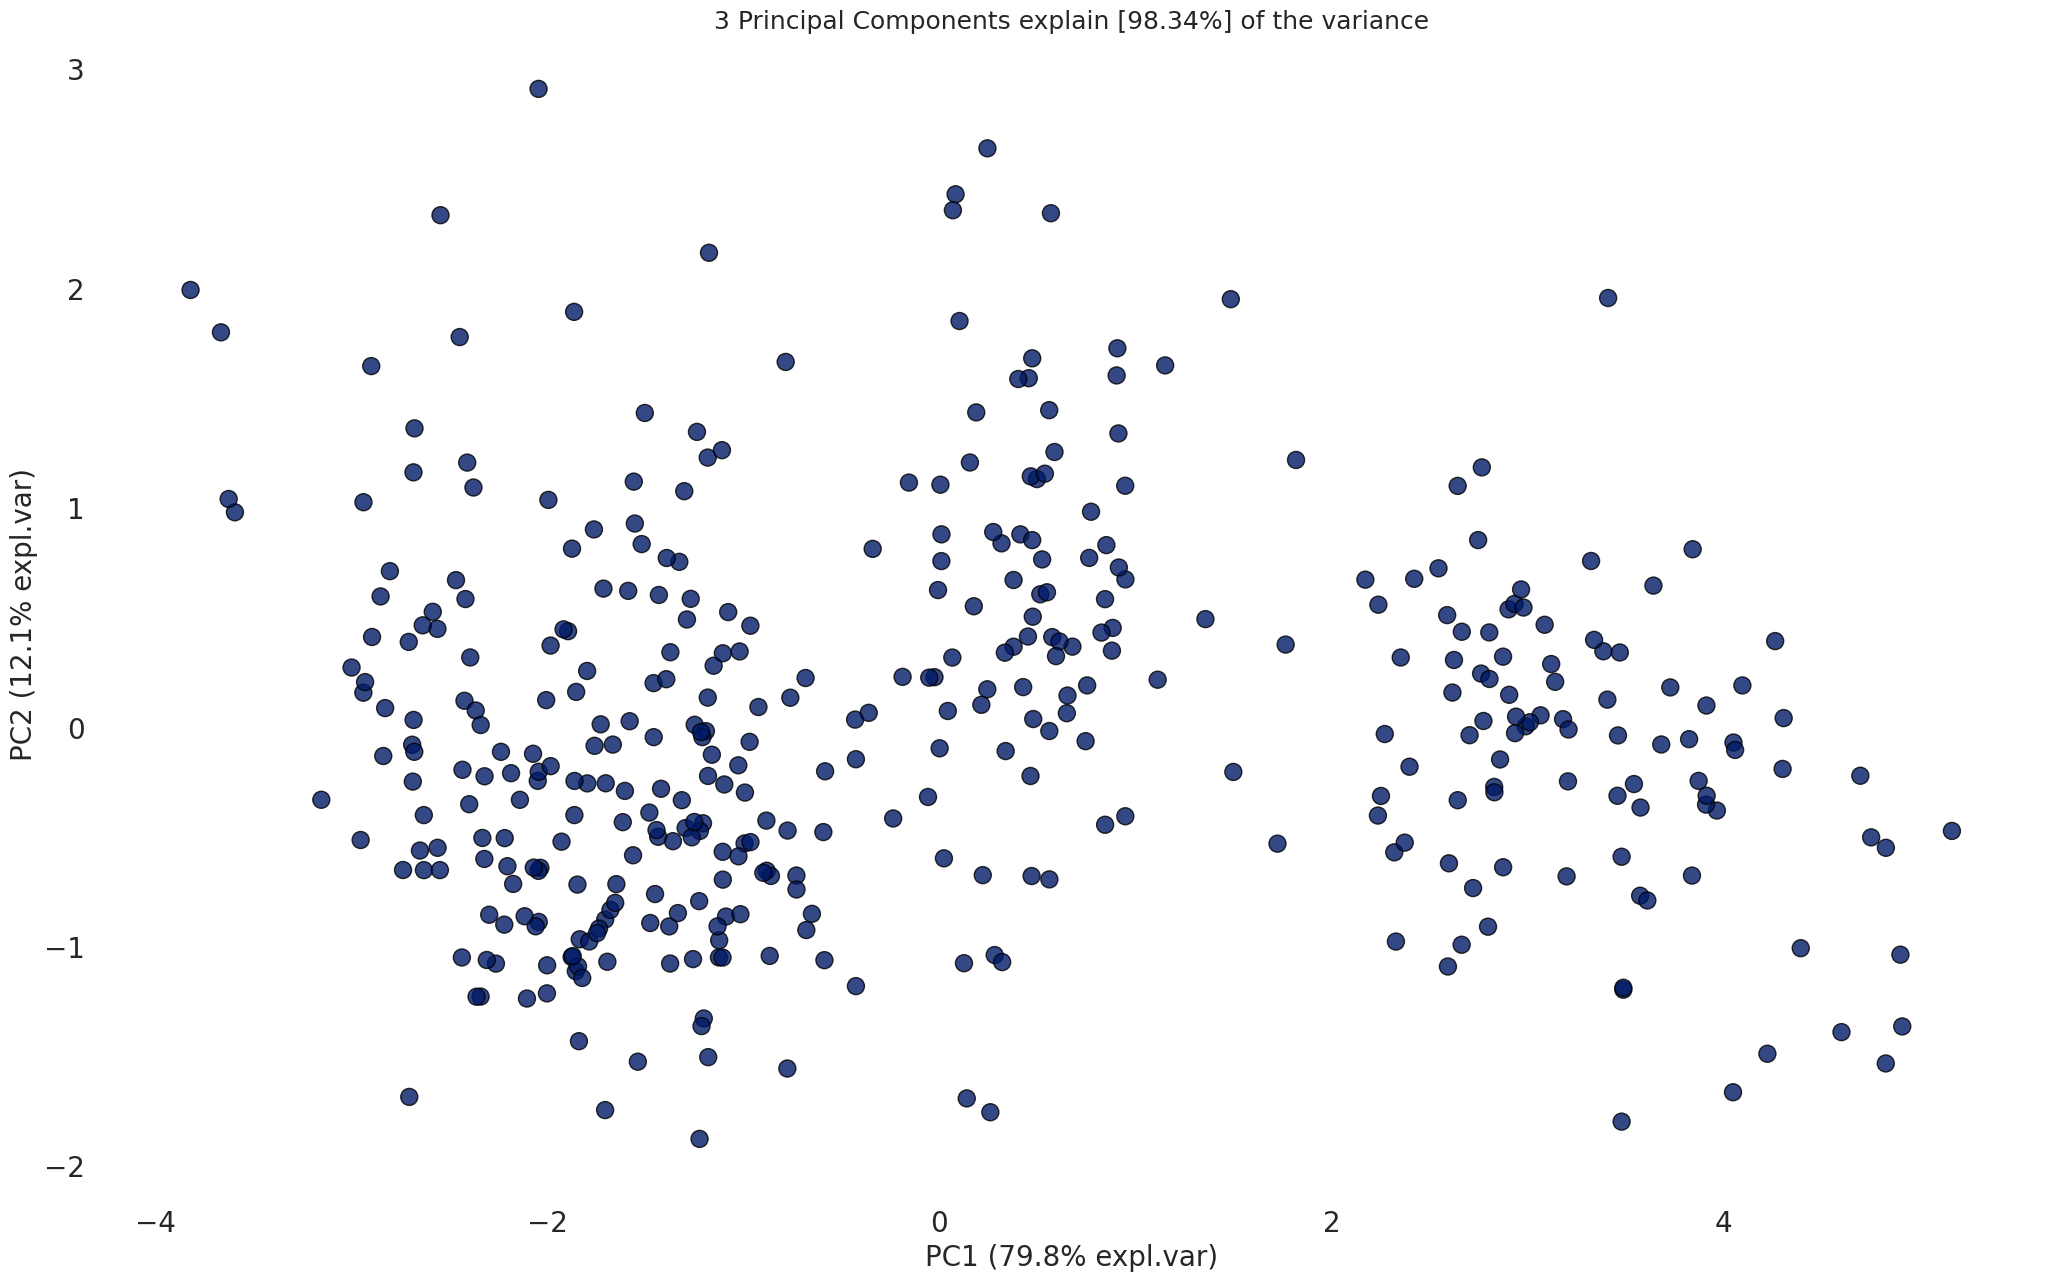

In [90]:
model.scatter(label=True, legend=False)

In [91]:
A = out['loadings'].T


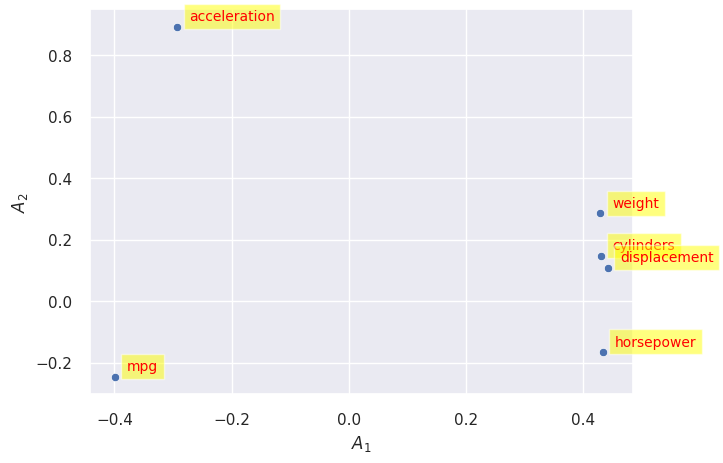

In [92]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Varince Ratio

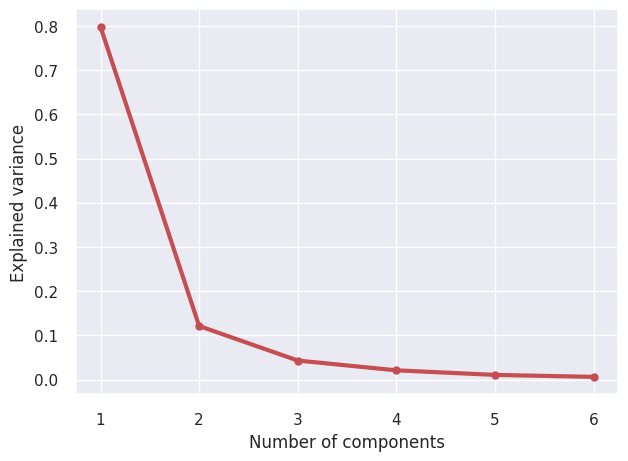

In [93]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

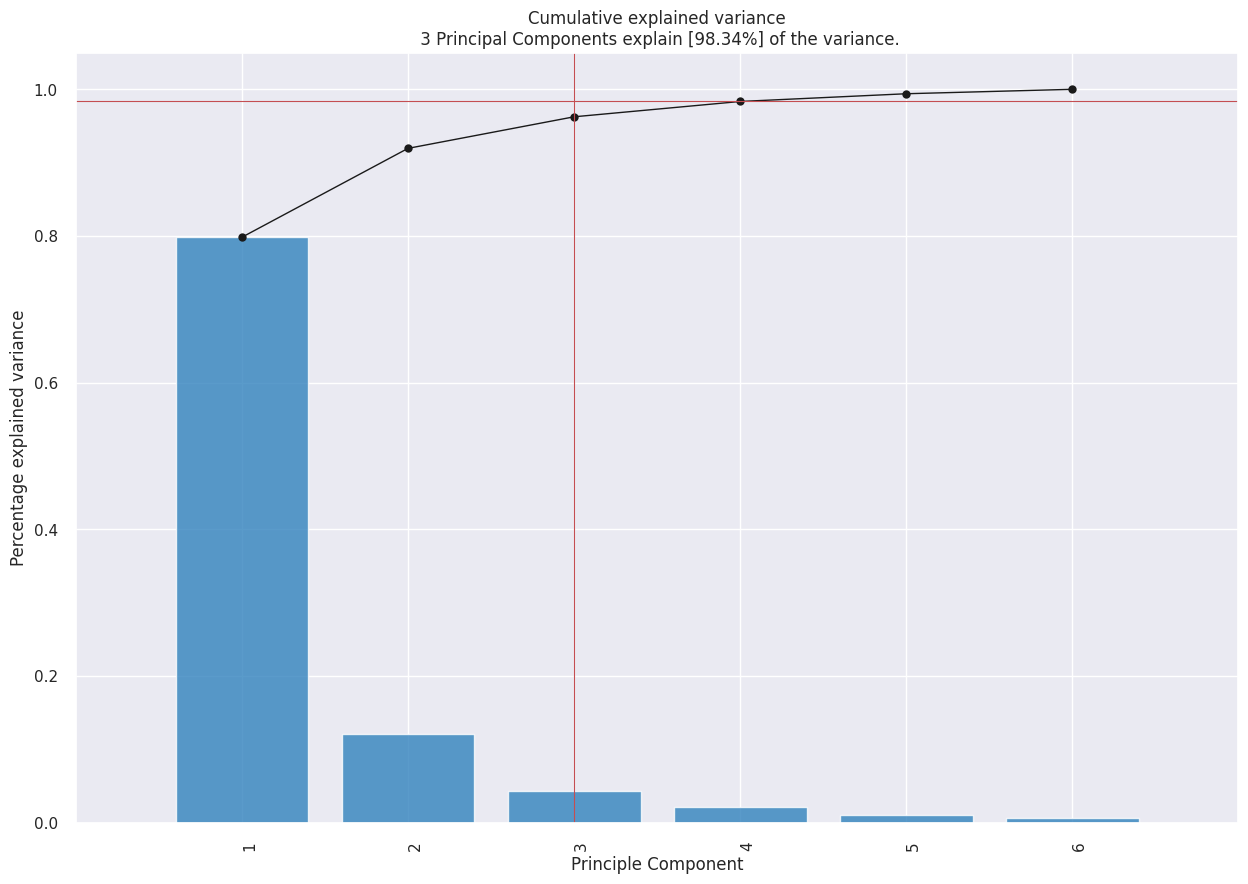

<Figure size 700x500 with 0 Axes>

In [94]:
model.plot();

3D Biplot

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


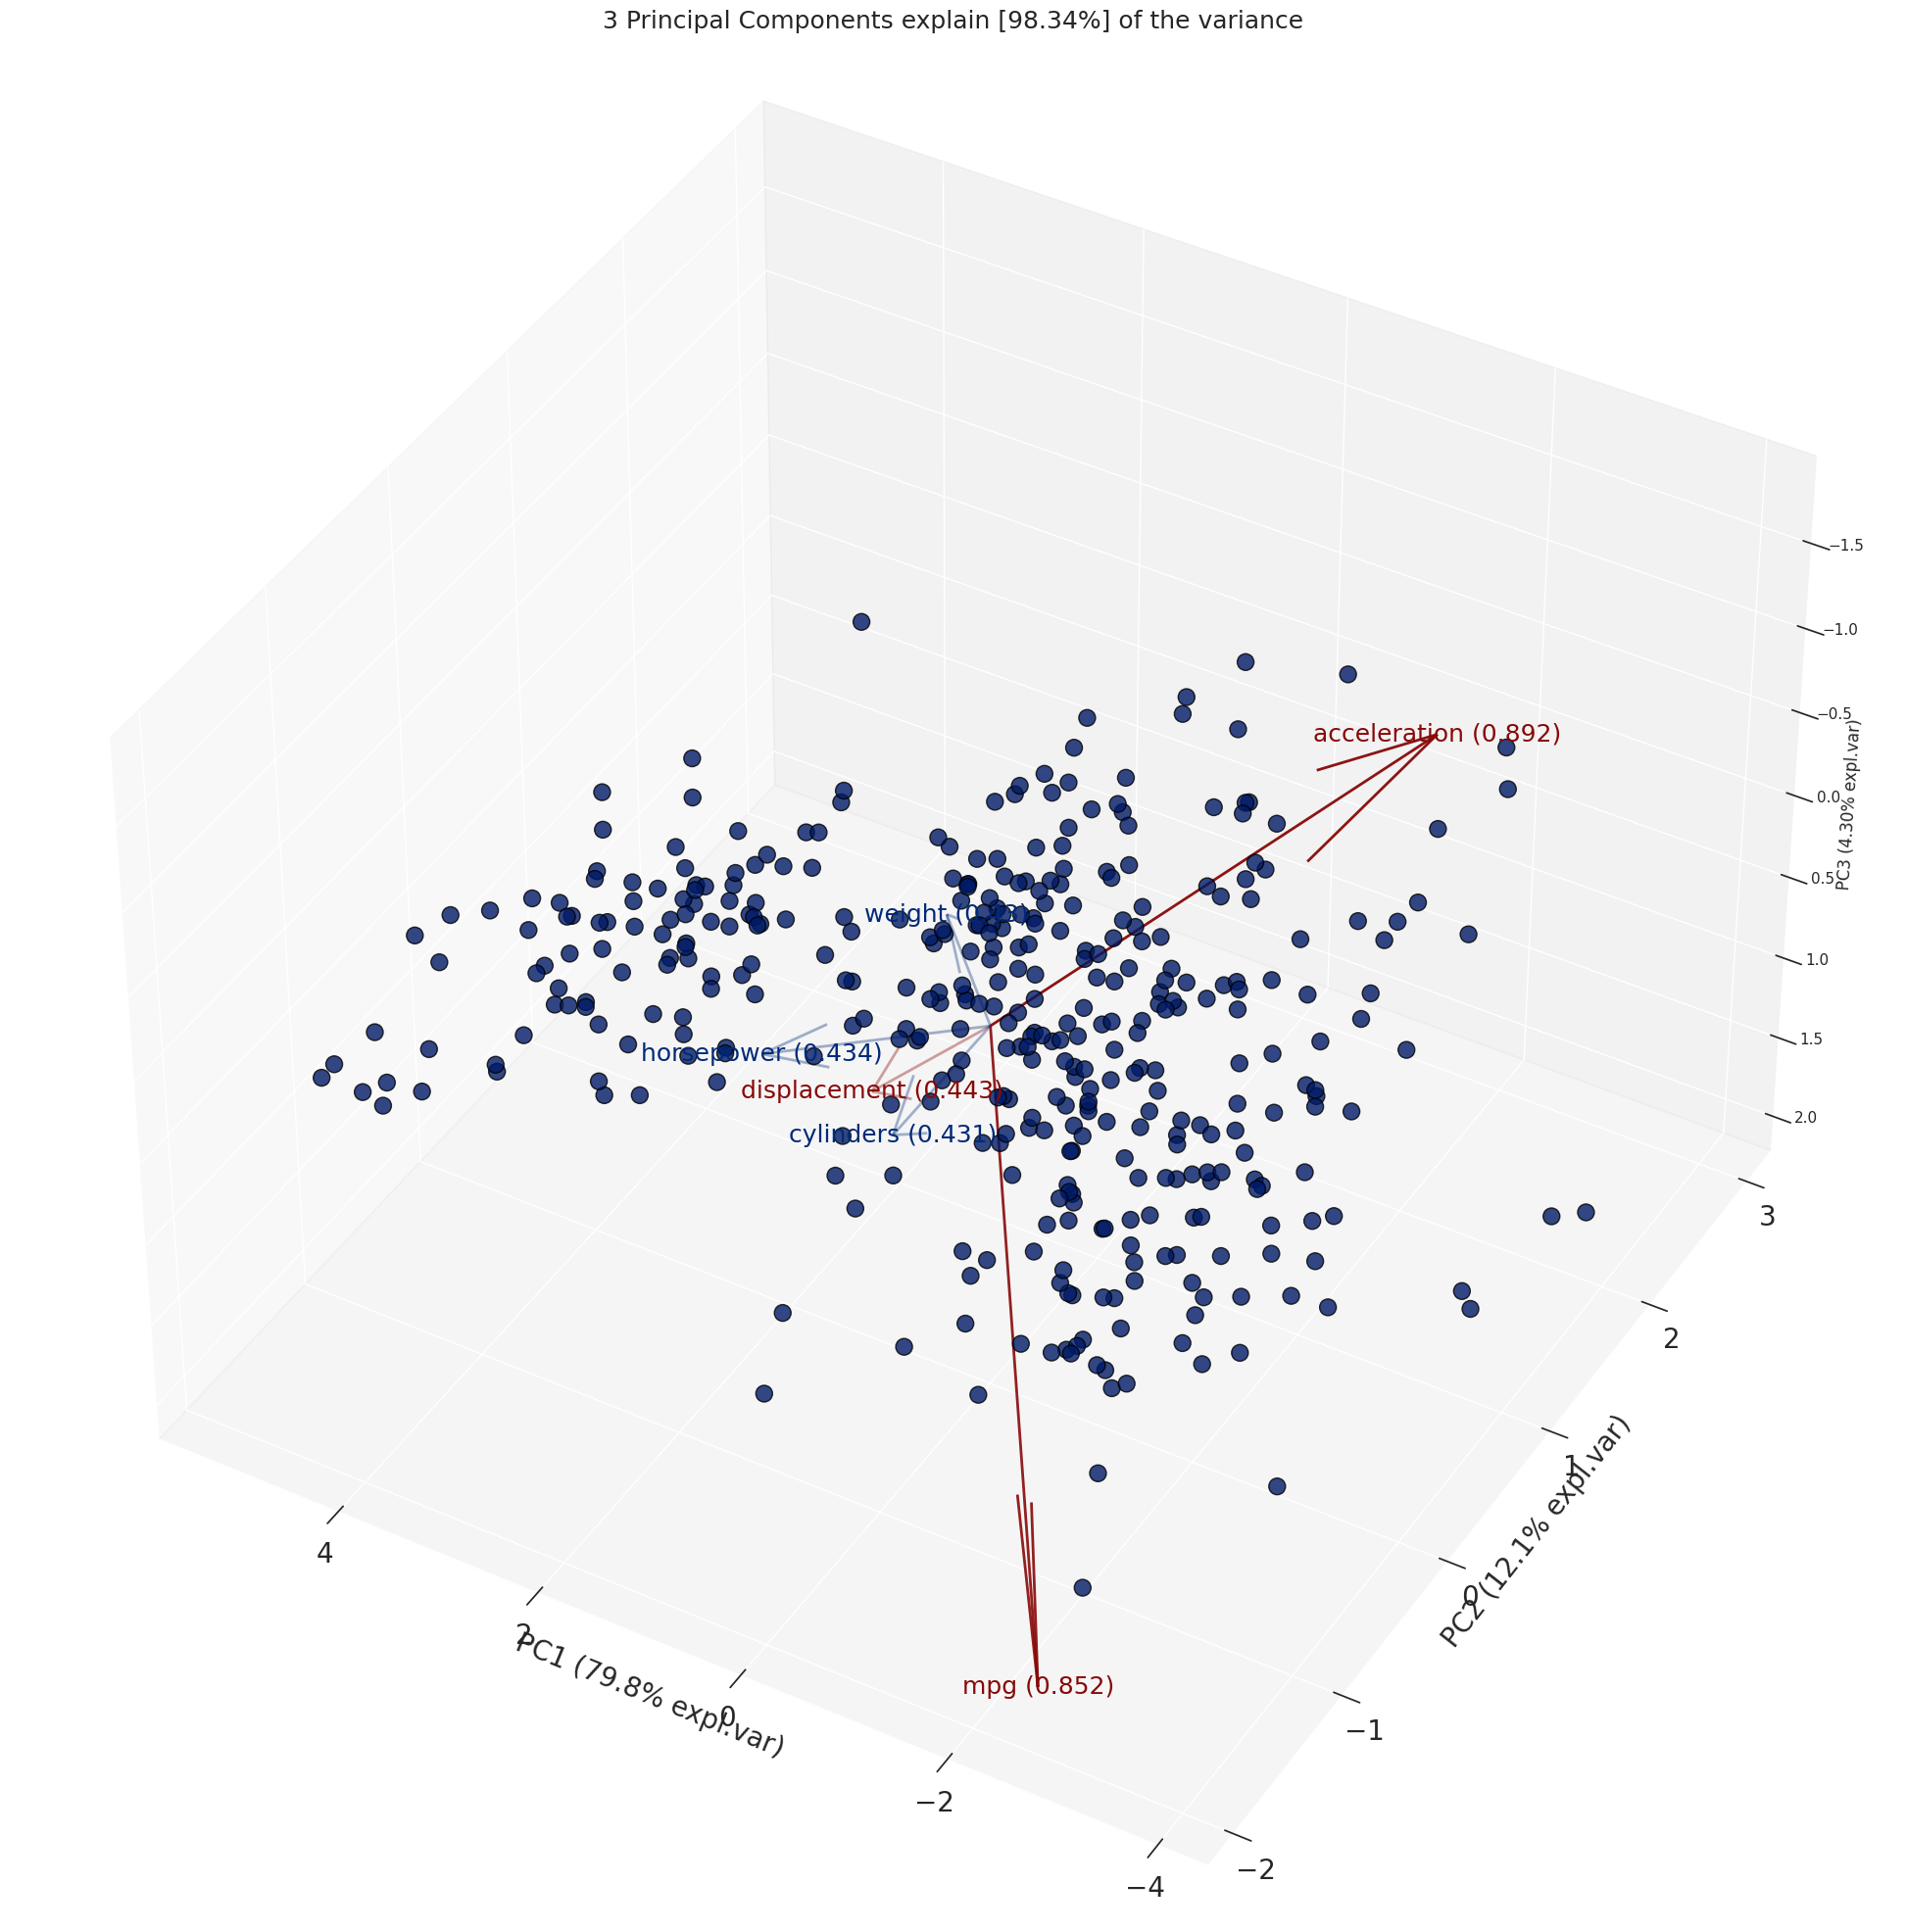

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [98.34%] of the variance'}, xlabel='PC1 (79.8% expl.var)', ylabel='PC2 (12.1% expl.var)', zlabel='PC3 (4.30% expl.var)'>)

In [95]:
model.biplot3d(legend=False)

Classification Using PyCaret

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/Gurpreet-KSaini/INSE6220/main/INSE6220_Automobile.csv')
df.head(25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,Class
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1
5,15.0,8,429.0,198,4341,10.0,1
6,14.0,8,454.0,220,4354,9.0,1
7,14.0,8,440.0,215,4312,8.5,1
8,14.0,8,455.0,225,4425,10.0,1
9,15.0,8,390.0,190,3850,8.5,1


In [97]:
df["Class"].unique()
print(df.count())

mpg             391
cylinders       391
displacement    391
horsepower      391
weight          391
acceleration    391
Class           391
dtype: int64


In [98]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (352, 7)
Unseen Data For Predictions: (39, 7)


In [99]:
data_unseen

,mpg,cylinders,displacement,horsepower,weight,acceleration,Class
0,15.0,8,429.0,198,4341,10.0,1
1,25.0,4,110.0,87,2672,17.5,2
2,28.0,4,116.0,90,2123,14.0,2
3,35.0,4,72.0,69,1613,18.0,3
4,15.0,8,318.0,150,4135,13.5,1
5,15.0,8,318.0,150,3777,12.5,1
6,18.0,6,232.0,100,2945,16.0,1
7,23.0,6,198.0,95,2904,16.0,1
8,13.0,8,360.0,170,4654,13.0,1
9,11.0,8,350.0,180,3664,11.0,1


In [100]:
print(data_unseen.count())

mpg             39
cylinders       39
displacement    39
horsepower      39
weight          39
acceleration    39
Class           39
dtype: int64


In [101]:
print(data.index)

RangeIndex(start=0, stop=352, step=1)


Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.







In [102]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(352, 7)"
5,Transformed data shape,"(352, 7)"
6,Transformed train set shape,"(246, 7)"
7,Transformed test set shape,"(106, 7)"
8,Numeric features,6
9,Preprocess,True


Comparing All Models

In [103]:
 #show the best model and their statistics
 best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8335,0.9440,0.8335,0.8371,0.8275,0.6827,0.6874,0.3330
lightgbm,Light Gradient Boosting Machine,0.8330,0.9473,0.8330,0.8444,0.8226,0.6772,0.6880,0.1570
rf,Random Forest Classifier,0.8210,0.9482,0.8210,0.8247,0.8134,0.6617,0.6687,0.1700
xgboost,Extreme Gradient Boosting,0.8208,0.9440,0.8208,0.8128,0.8085,0.6544,0.6634,0.1170
gbc,Gradient Boosting Classifier,0.8168,0.9422,0.8168,0.8195,0.8058,0.6471,0.6558,0.2200
dt,Decision Tree Classifier,0.8047,0.8387,0.8047,0.8013,0.7965,0.6299,0.6382,0.0660
ada,Ada Boost Classifier,0.7688,0.8933,0.7688,0.7742,0.7656,0.5642,0.5687,0.1200
lr,Logistic Regression,0.7605,0.9104,0.7605,0.7764,0.7599,0.5595,0.5678,0.3920
qda,Quadratic Discriminant Analysis,0.7435,0.9098,0.7435,0.7807,0.7472,0.5454,0.5587,0.0630
ridge,Ridge Classifier,0.7112,0.0000,0.7112,0.6974,0.6892,0.4551,0.4736,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [104]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Create a Model

In [105]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.9301,0.7600,0.7514,0.7532,0.5253,0.5274
1,0.8800,0.9660,0.8800,0.8800,0.8800,0.7713,0.7713
2,0.8800,0.9434,0.8800,0.8714,0.8732,0.7627,0.7657
3,0.7200,0.9170,0.7200,0.7476,0.7196,0.5139,0.5241
4,0.8400,0.9560,0.8400,0.8250,0.8238,0.7059,0.7127
5,0.8800,0.9340,0.8800,0.8850,0.8797,0.7794,0.7821
6,0.9583,0.9808,0.9583,0.9609,0.9560,0.9197,0.9236
7,0.7917,0.9349,0.7917,0.7917,0.7917,0.6129,0.6129
8,0.8333,0.9438,0.8333,0.8660,0.8061,0.6522,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [106]:
#trained model object is stored in the variable 'et'. 
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Tune the Best Model

In [107]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9373,0.8000,0.7940,0.7885,0.6069,0.6132
1,0.8800,0.9601,0.8800,0.9250,0.8883,0.7851,0.8018
2,0.7600,0.8796,0.7600,0.7802,0.7573,0.5702,0.5824
3,0.6800,0.8920,0.6800,0.7889,0.7034,0.5000,0.5293
4,0.6800,0.8560,0.6800,0.7857,0.7031,0.5000,0.5267
5,0.8400,0.9480,0.8400,0.8505,0.8434,0.7222,0.7245
6,0.6667,0.9451,0.6667,0.7698,0.6997,0.4545,0.4724
7,0.7500,0.9329,0.7500,0.8056,0.7720,0.5663,0.5740
8,0.7917,0.9396,0.7917,0.9074,0.8114,0.6296,0.6699


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [108]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Evaluate the Best Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

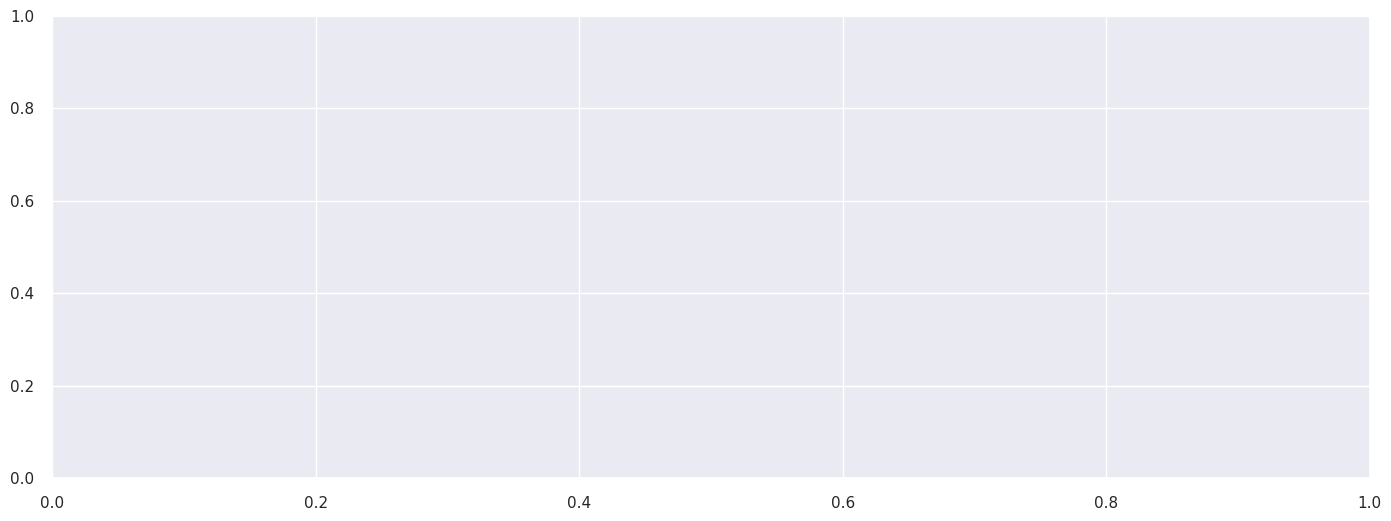

In [109]:
evaluate_model(tuned_et)

In [110]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6800,0.8025,0.6800,0.6353,0.6463,0.3174,0.3287
1,0.7200,0.8559,0.7200,0.7240,0.7200,0.4681,0.4695
2,0.6800,0.7507,0.6800,0.7013,0.6578,0.2933,0.3148
3,0.7200,0.8190,0.7200,0.6808,0.6950,0.4697,0.4768
4,0.5600,0.7180,0.5600,0.5125,0.5349,0.1912,0.1930
5,0.6400,0.8310,0.6400,0.5000,0.5556,0.2241,0.2681
6,0.6250,0.7170,0.6250,0.5764,0.5921,0.2258,0.2339
7,0.6667,0.8576,0.6667,0.6606,0.6555,0.3557,0.3598
8,0.6667,0.8141,0.6667,0.5778,0.6138,0.2000,0.2195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [112]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6400,0.8835,0.6400,0.5030,0.5553,0.1279,0.1586
1,0.7200,0.8713,0.7200,0.6933,0.6980,0.4243,0.4319
2,0.5600,0.7005,0.5600,0.5518,0.5543,0.1325,0.1330
3,0.5600,0.7410,0.5600,0.5600,0.5600,0.2143,0.2143
4,0.6000,0.7630,0.6000,0.6000,0.5980,0.2857,0.2865
5,0.7600,0.9210,0.7600,0.7333,0.7343,0.5312,0.5470
6,0.7083,0.8743,0.7083,0.7475,0.7228,0.4783,0.4830
7,0.7500,0.8885,0.7500,0.7679,0.7529,0.5528,0.5582
8,0.7083,0.8495,0.7083,0.6852,0.6879,0.3636,0.3714


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

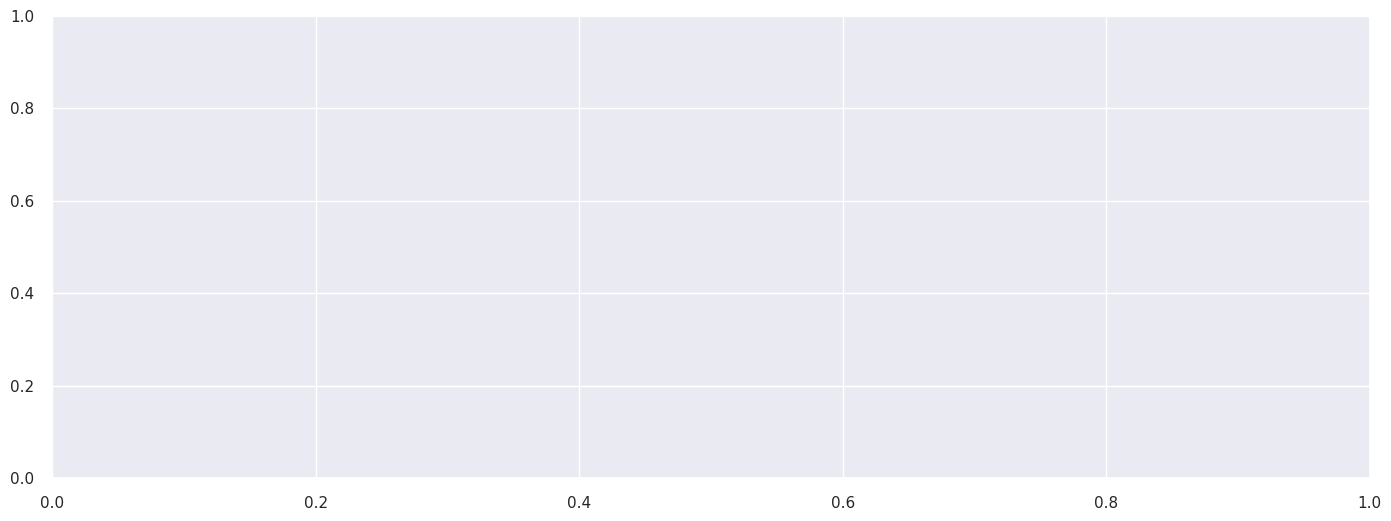

In [113]:
evaluate_model(tuned_knn)

In [114]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9521,0.8000,0.8240,0.8105,0.6324,0.6346
1,0.7200,0.8777,0.7200,0.7257,0.7133,0.4632,0.4690
2,0.8400,0.9041,0.8400,0.8533,0.8426,0.6942,0.6963
3,0.7200,0.8860,0.7200,0.7200,0.7180,0.5000,0.5014
4,0.6400,0.8780,0.6400,0.6560,0.6389,0.3750,0.3825
5,0.7600,0.9220,0.7600,0.7475,0.7450,0.5455,0.5536
6,0.7917,0.9452,0.7917,0.8519,0.7996,0.6460,0.6726
7,0.7917,0.9217,0.7917,0.7865,0.7867,0.6000,0.6024
8,0.7917,0.9177,0.7917,0.7778,0.7722,0.5833,0.5916


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [115]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9591,0.8000,0.7914,0.7932,0.6044,0.6069
1,0.7200,0.8701,0.7200,0.7257,0.7133,0.4632,0.4690
2,0.8400,0.9065,0.8400,0.8533,0.8426,0.6942,0.6963
3,0.7600,0.8940,0.7600,0.7450,0.7508,0.5588,0.5608
4,0.7200,0.8760,0.7200,0.8089,0.7010,0.5000,0.5246
5,0.7600,0.9300,0.7600,0.7475,0.7450,0.5455,0.5536
6,0.7917,0.9364,0.7917,0.8519,0.7996,0.6460,0.6726
7,0.7500,0.9196,0.7500,0.7524,0.7428,0.5216,0.5273
8,0.7917,0.9156,0.7917,0.7778,0.7722,0.5833,0.5916


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

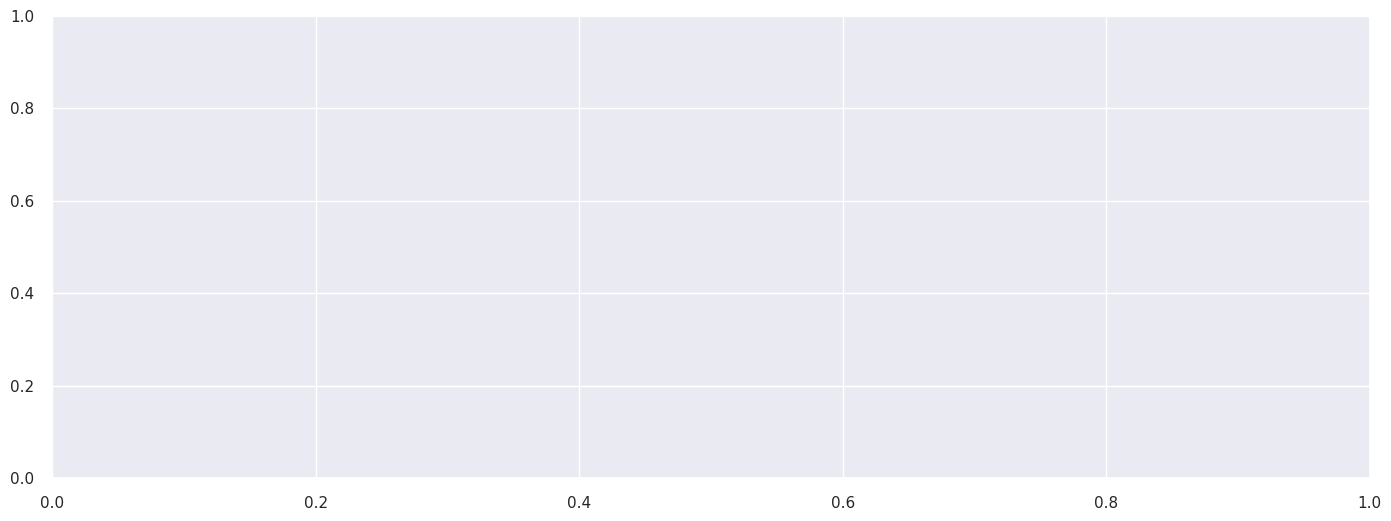

In [116]:
evaluate_model(tuned_lr)

In [117]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.9461,0.7600,0.7447,0.7507,0.5268,0.5289
1,0.9200,0.9861,0.9200,0.9280,0.9200,0.8480,0.8506
2,0.8800,0.9244,0.8800,0.8714,0.8732,0.7627,0.7657
3,0.7200,0.9060,0.7200,0.7538,0.7263,0.5270,0.5375
4,0.7600,0.9450,0.7600,0.7788,0.7570,0.5946,0.6064
5,0.9200,0.9830,0.9200,0.9294,0.9181,0.8485,0.8584
6,0.8333,0.9753,0.8333,0.8255,0.8271,0.6800,0.6827
7,0.7917,0.9415,0.7917,0.7778,0.7825,0.6117,0.6136
8,0.8333,0.9370,0.8333,0.8660,0.8061,0.6522,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [118]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9608,0.8400,0.8460,0.8400,0.6960,0.6982
1,0.8800,0.9743,0.8800,0.9029,0.8840,0.7857,0.7959
2,0.7600,0.9098,0.7600,0.8080,0.7786,0.5601,0.5653
3,0.6400,0.8800,0.6400,0.7600,0.6667,0.4375,0.4677
4,0.7200,0.8760,0.7200,0.8111,0.7319,0.5625,0.5954
5,0.8400,0.9840,0.8400,0.8505,0.8434,0.7222,0.7245
6,0.7500,0.9670,0.7500,0.8553,0.7703,0.5944,0.6334
7,0.8333,0.9288,0.8333,0.8472,0.8383,0.7000,0.7025
8,0.8333,0.9438,0.8333,0.8841,0.8345,0.6800,0.6963


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
